<h1><center><b> GROUP PROJECT - GOOGLE PLAYSTORE APPLICATIONS ANALYSIS</b></center></h1>

Team Name: <b>Data Analyzing Pirates</b><br>
Team Members:<br>
Michael Moorman  <br>
Dosbol Aliev  <br>
Abraar Patel 

The task for this project is a **classification task** since we predict a categorical dependent variable using a set of independent variables.The dataset used for this project is **Google PlayStore**. For this project, we will predict the number of installs for the applications.

<u>About the data attributes in the dataset:</u><br>
1) App - Name of the application<br>
2) Category - Category of the application<br>
3) Rating - Overall user rating of the application<br>
4) Reviews - Number of user reviews for the application<br>
5) Size - Size of the application<br>
6) Installs - Number of user installs for the application<br>
7) Type - Type of application (Paid or Free)<br>
8) Price - Price of the application in USD<br>
9) Content Rating - Age group the application is targeted at<br>
10) Genres - Genre the application belongs to<br>
11) Last Updated - Date when the application was last updated on Google Playstore<br>
12) Current Ver - Current Version of the application available on Google Playstore<br>
13) Android Ver - Android version supported by the application<br>

**EXPLORATORY DATA ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import copy

In [2]:
# Code will try to load data from Google Drive if run on Colab, otherwise, assume it is in the working dir.
try:
  from google.colab import drive
  drive.mount('/content/drive')
  mypath = "/content/drive/My Drive/Colab Notebooks/Google PlayStore Dataset/"
except:
  mypath = "./"

Mounted at /content/drive


In [3]:
playstore_df = pd.read_csv(mypath + 'googleplaystore.csv')
# We keep a full copy of the dataset for use later
original_df = copy.deepcopy(playstore_df)
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are a total of 10841 observations and 13 attributes in the dataset. By looking at our previous output, we observe that there are missing values in the dataset. Features 'Rating', 'Type', 'Content Rating', 'Current Var', 'Android Ver' have missing values which need to be handled.

In [5]:
# printing the number of missing values in each attribute

playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we see from the above output,<br> 
There are 1474 missing values in the Rating column.<br>
There is 1 missing value in the Type column.<br> 
There are 8 missing values in the Current Ver column.<br>
There are 3 missing values in the Android Ver column. 

In [6]:
print(playstore_df.shape)
playstore_df.drop_duplicates(subset=['App'], keep='first', inplace=True)
print(playstore_df.shape)

(10841, 13)
(9660, 13)


In [7]:
playstore_df.describe()

,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
# printing the number of unique values in each attribute

playstore_df.nunique()

App               9660
Category            34
Rating              40
Reviews           5331
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             119
Last Updated      1378
Current Ver       2770
Android Ver         33
dtype: int64

We will drop App column and Current Ver column since they are not useful in contributing to our problem statement. We will also drop Category column since it is almost similar to Genres column.




In [9]:
playstore_df.drop(labels=['App', 'Category', 'Current Ver'], axis=1, inplace=True)

<h4><u>Preprocessing of Size feature:</u></h4>

In [10]:
# we notice that Size feature have input values as "varies with device". We will print how many observations in Size column have "varies with device" values

vary_size = playstore_df[playstore_df['Size'] == "Varies with device"]
vary_size['Size'].value_counts()

Varies with device    1227
Name: Size, dtype: int64

In [11]:
def clean_size(i):
  if 'M' in i:
    i = float(i.strip('M'))
  elif 'k' in i:
    i = float(i.strip('k'))
    i /= 1000
  else:
    i = 'NaN'  # assigning NaN to observations in Size feature whose value is "varies with device"

  return i

playstore_df['Size'] = playstore_df['Size'].map(clean_size)

The Size attribute is categorical since it has M, k in it's values. So, we will fix this by converting it into numerical feature by removing M,k from its values and keeping all sizes in Megabytes (M)

Now, all the sizes of the applications are in Megabytes (M).

<h4><u>Preprocessing of Installs feature:</u></h4>

In [12]:
playstore_df = playstore_df[playstore_df['Installs'] != 'Free']

def convert_installs(install):
    return int(np.floor(np.log10(int(install.replace(',','').replace('+',''))+1)))

playstore_df['Installs'] = playstore_df['Installs'].map(convert_installs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h4><u>Preprocessing of Reviews feature:</u></h4>

In [13]:
def convert_reviews(review):
    return int(np.floor(np.log10(int(review)+1)))

playstore_df['Reviews'] = playstore_df['Reviews'].map(convert_reviews)

<h4><u>Preprocessing of Type feature:</u></h4>

In [14]:
from sklearn.preprocessing import LabelEncoder

playstore_df['Type'].loc[playstore_df[playstore_df['Type'].isnull()].index] = 'Free'
playstore_df['Type'].unique()
playstore_df['Type'] = LabelEncoder().fit_transform(playstore_df['Type'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


####<u>Preprocessing of Price feature:</u>

In [15]:
# removing the $ from the observations in Price feature
playstore_df['Price'] = playstore_df['Price'].str.replace('$', '')    
playstore_df['Price'] = playstore_df['Price'].str.replace('Everyone', '0')    # replacing values with 'Everyone' with 0

# converting Price to a numerical feature
playstore_df['Price'] = playstore_df['Price'].astype('float')   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<h4><u>Preprocessing of Content Rating feature:</u></h4>

In [16]:
content_rating_mapping = {'Everyone':0,
                          'Unrated':0,
                          'Everyone 10+':1,
                          'Teen':2,
                          'Mature 17+':3,
                          'Adults only 18+':4}
playstore_df['Content Rating'] = playstore_df['Content Rating'].map(content_rating_mapping)

<h4><u>Preprocessing of Genres feature:</u></h4>

In [17]:
# Save the Genres column for Apriori association analysis later
genres_df = playstore_df[['Genres','Installs']]

In [18]:
def app_genre(str):
  return str.split(';')[0]

playstore_df['Genres'] = playstore_df['Genres'].apply(app_genre)

print("The unique app genres in our dataset are:")
pd.unique(playstore_df['Genres'])

The unique app genres in our dataset are:


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [19]:
playstore_df['Genres'].value_counts()

Tools                      827
Entertainment              592
Education                  580
Business                   420
Medical                    395
Personalization            376
Productivity               374
Lifestyle                  370
Finance                    345
Sports                     335
Communication              316
Action                     311
Health & Fitness           290
Photography                281
News & Magazines           254
Social                     239
Books & Reference          225
Casual                     225
Travel & Local             219
Simulation                 206
Shopping                   202
Arcade                     199
Dating                     171
Video Players & Editors    165
Puzzle                     142
Maps & Navigation          131
Role Playing               115
Food & Drink               112
Racing                     108
Educational                102
Strategy                    99
Auto & Vehicles             85
Librarie

In [20]:
# We will remove those genres of the app which have a single instance

unique = playstore_df['Genres'].unique()
removed_genres = [] 

# genres that have a single instance only will be placed within the to_remove array
for genre in unique:
  if (playstore_df['Genres'].value_counts()[genre]) == 1: 
   removed_genres += [genre]

print(f"{len(removed_genres)} Genres are to be removed from the dataset")

for name in removed_genres:
  playstore_df.drop(playstore_df[playstore_df['Genres'] == name].index, inplace=True)



1 Genres are to be removed from the dataset


In [21]:
# printing value counts of Genre feature again

playstore_df['Genres'].value_counts()

Tools                      827
Entertainment              592
Education                  580
Business                   420
Medical                    395
Personalization            376
Productivity               374
Lifestyle                  370
Finance                    345
Sports                     335
Communication              316
Action                     311
Health & Fitness           290
Photography                281
News & Magazines           254
Social                     239
Books & Reference          225
Casual                     225
Travel & Local             219
Simulation                 206
Shopping                   202
Arcade                     199
Dating                     171
Video Players & Editors    165
Puzzle                     142
Maps & Navigation          131
Role Playing               115
Food & Drink               112
Racing                     108
Educational                102
Strategy                    99
Auto & Vehicles             85
Librarie

####<u>Preprocessing of Android Ver feature:</u>

In [22]:
# we notice that Android ver feature have input values as "varies with device". We will print how many observations in Size column have "varies with device" values

vary_android_ver = playstore_df[playstore_df['Android Ver'] == "Varies with device"]
vary_android_ver['Android Ver'].value_counts()

Varies with device    990
Name: Android Ver, dtype: int64

In [23]:
# we will remove 'and up' from the values in Android Ver feature

def clean_android_ver(x):
    if x == "Varies with device":
      x = 'NaN'   
    else:
      x = str(x).replace('and up', ' ')

    return x

playstore_df['Android Ver'] = playstore_df['Android Ver'].map(clean_android_ver)



####<u>Preprocessing of Last Updated feature:</u>

In [24]:
# Converting the Last Updated feature to date format

playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])
playstore_df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [25]:
playstore_df['Last Updated'] = playstore_df['Last Updated'].map(lambda date: date.year)

####<u>Handling of missing values in the dataset:</u>

In [26]:
# we are going to perform imputation on the missing values of Size feature

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(playstore_df[['Size']])
playstore_df['Size'] = imputer.transform(playstore_df[['Size']])

In [27]:
# we are going to perform imputation on the missing values of Android Ver feature

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values='NaN', strategy='most_frequent')
imputer = imputer.fit(playstore_df[['Android Ver']])
playstore_df['Android Ver'] = imputer.transform(playstore_df[['Android Ver']])

In [28]:
# removing rest of the NaN values using dropna()

playstore_df.dropna(inplace=True)

In [29]:
# printing the number of missing values in each attribute again

playstore_df.isnull().sum()

Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64

Looking at the above output, we infer that there are no missing values in the dataset now.

In [30]:
# printing the size of dataframe after removing the missing values in the dataset.

playstore_df.shape

(8195, 10)

We will add a new column 'Earnings' to determine how much the applications earn from the cost of the app.

In [31]:
playstore_df["Earning"]= playstore_df["Price"]*10**(playstore_df["Installs"])
playstore_df[playstore_df['Type'] == 1]['Earning']
playstore_df.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Earning
0,4.1,2,19.0,4,0,0.0,0,Art & Design,2018,4.0.3,0.0
1,3.9,2,14.0,5,0,0.0,0,Art & Design,2018,4.0.3,0.0
2,4.7,4,8.7,6,0,0.0,0,Art & Design,2018,4.0.3,0.0
3,4.5,5,25.0,7,0,0.0,2,Art & Design,2018,4.2,0.0
4,4.3,2,2.8,5,0,0.0,0,Art & Design,2018,4.4,0.0


In [32]:
playstore_df[playstore_df['Type'] == 1]['Earning']

234      499000.00
235      499000.00
427      399000.00
476       39900.00
477        6990.00
           ...    
10690        99.00
10697         0.99
10760      7990.00
10782    169900.00
10785     12000.00
Name: Earning, Length: 604, dtype: float64

In [33]:
# Printing the data types of all the attributes
playstore_df.dtypes

Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres             object
Last Updated        int64
Android Ver        object
Earning           float64
dtype: object

##**DATA VISUALIZATION**

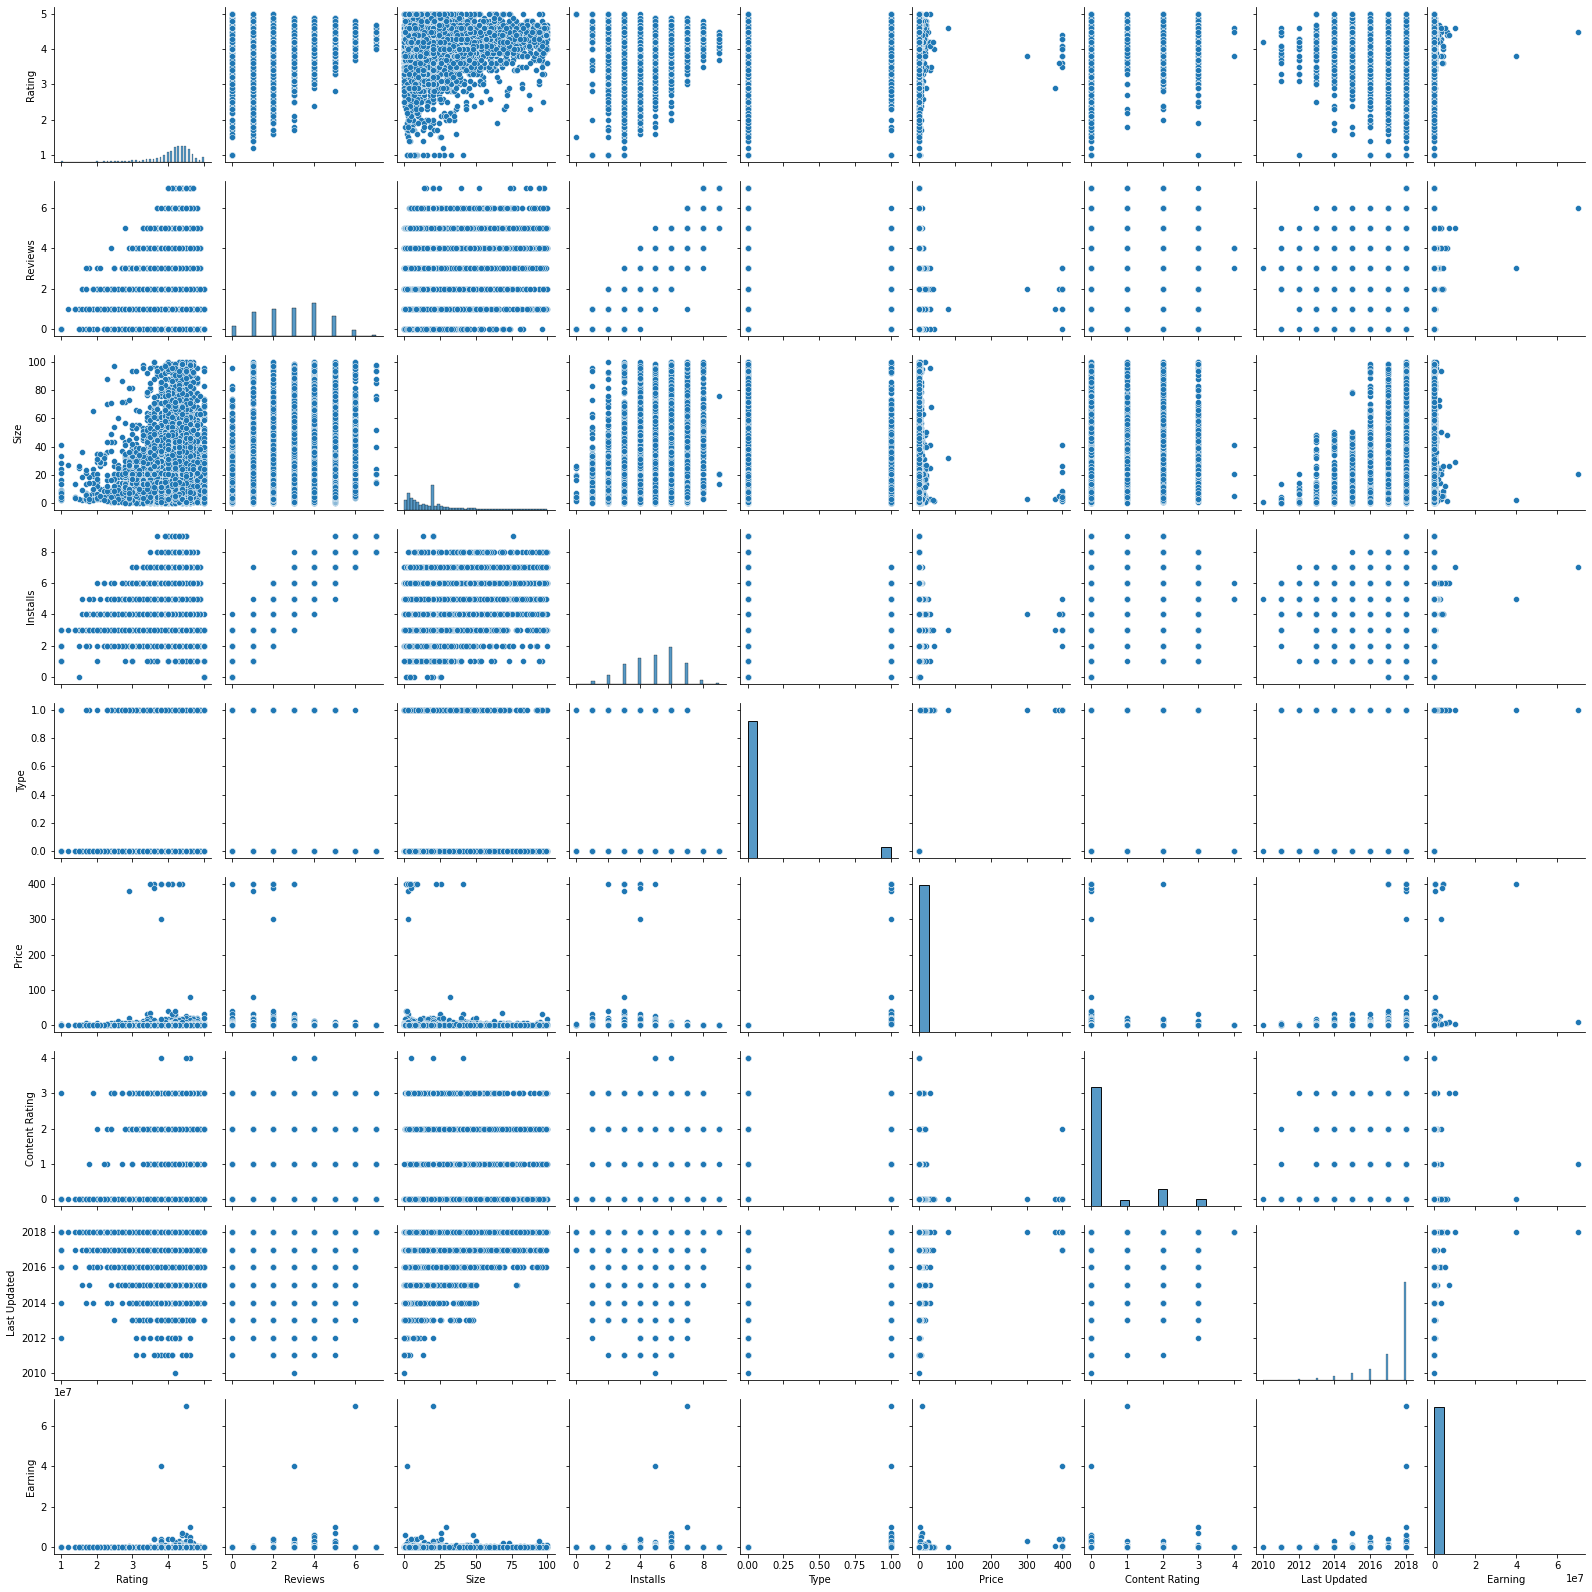

In [ ]:
sns.pairplot(playstore_df)
plt.show()

From the above pairplot, we can find the relationship or correlation between variables across multiple dimensions. The diagonal in the pairplot are distribution plots showing the marginal distribution of numerical features in our dataframe. The rest of the plots shows the correlation or relationship between different attributes. We infer that Reviews is a significant feature in finding the number of installs for an application since they are strongly correlated with the Installs variable ( which is indeed the target variable).

In [ ]:
fig = px.box(playstore_df, x='Installs', y='Size', color='Installs')
fig.show()

From the above boxplot, we infer that applications with around 100,000,000 installs (number 8) have the highest size (in Megabytes) and applications with 1 installs (number 0) have the lowest size (in Megabytes). We also observe that apps with 1 installs (number 0) have the lowest median and apps with with 100,000,000 installs (number 8) have the highest median. We also notice from the boxplot that there are a lots of outliers which could impact the performance of our models.

In [ ]:
fig = px.box(playstore_df, y='Rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

From the above boxplot, we infer that the ratings of the applications ranges from 3.3 to 5. However, we observe that there are few outliers below 3.3 which might affect the performance of our models.

In [ ]:
fig = px.box(playstore_df, y='Price')
fig.show()

From the above boxplot, we deduce that most of the applications are free and paid applications are few in number. However, there are few outliers too with exceptionally high price of apps of around $400 .

In [ ]:
px.box(playstore_df, x='Content Rating', y='Rating',color='Content Rating')

Looking at the above boxplot, we infer that apps which target Everyone (0), Everyone 10+ (1), Teens (2) and Mature people 17+ (3) have the highest ratings (5.0). The apps that target Adults 18+ (4) have slightly less number of ratings as compared to the other age groups. We also notice that except Adults (4), all the other age groups have ratings which are outliers.

In [ ]:
px.box(playstore_df, y='Installs', color_discrete_sequence=px.colors.sequential.RdBu )

By looking at the above boxplot, we deduce that installs of applications ranges from 10 installs (number 1) to around 1,000,000,000 installs (number 9). The median is at around 100,000 installs. We also observe that there is an outlier below 10 installs (number 1).

In [ ]:
fig = px.box(playstore_df, y='Size')
fig.show()

From the above boxplot, we infer that size of applications ranges from 0.085 megabytes to 57 megabytes. There are lots of outliers above 57 megabytes till 100 megabytes.

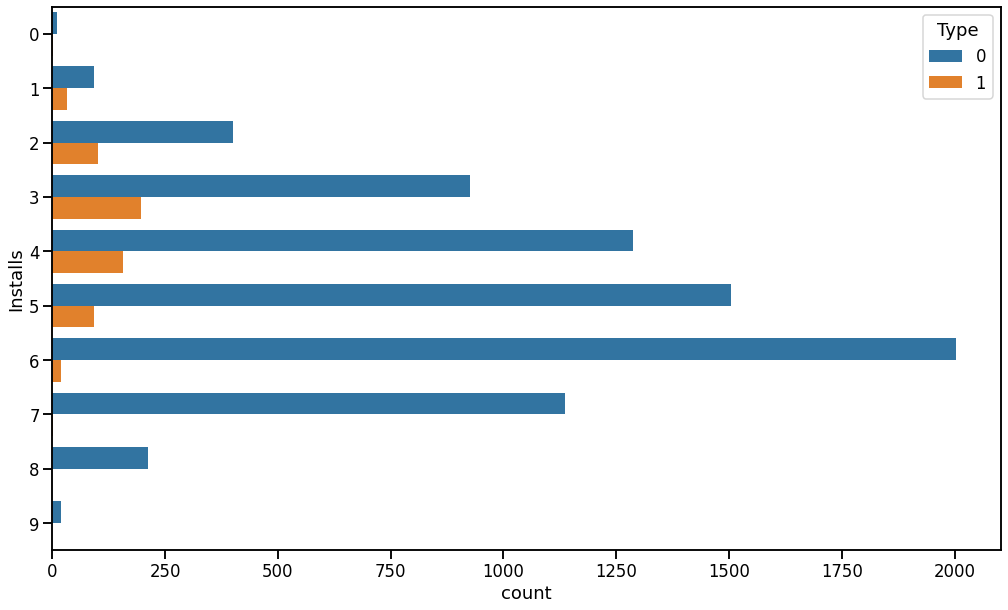

In [ ]:
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(17, 10))
sns.countplot(data=playstore_df, y='Installs', hue='Type')

From the above countplot, we infer that there are very few paid applications compared to free applications based on the number of installs of an application. Majority of the free applications have around 1,000,000 installs (number 6). There are very few free apps with 1,000,000,000 installs (number 9). The number of free applications decreases after 1,000,000 installs. There are no paid apps when number of installs ranges from 10,000,000 (number 7) to 1,000,000,000 (number 9).

Text(0.5, 1.0, 'Countplot of Last Updated')

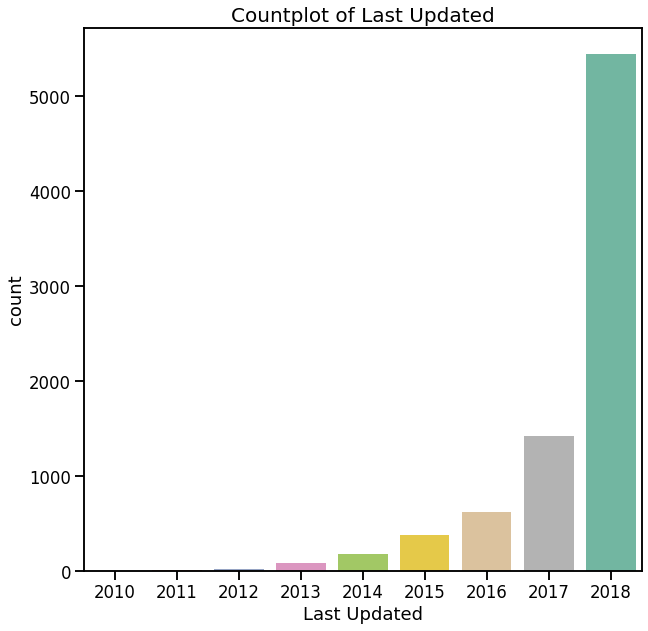

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="Last Updated", data=playstore_df, palette = "Set2")
plt.title('Countplot of Last Updated', size = 20)

From the above countplot, we infer that there are majority of applications (above 6000) which are updated recently (in 2018). We notice that no applications were updated from 2010-2012. From 2013 till 2017, applications were updated but not very frequently as in 2018.

In [ ]:
pie_chart = px.pie(playstore_df, names='Type')
pie_chart.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#000002', width=2)))
pie_chart.update_layout(title_text ='Composition of Free Apps and Paid Apps', title_x=0.5)

By looking at the above pie chart,  we deduce that 92.6% of the applications are free applications and only 7.37% of the applications are paid applications.

In [ ]:
df=playstore_df.query("Rating>0.0")
df=df.groupby("Rating")["Installs"].count().reset_index()

fig=px.area(df,x="Rating",y='Installs',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text ='Overall Rating Trend vs Installs', title_x=0.5)

fig.show()

From the above plot, we infer that applications with maximum number of installs have user ratings which range from 4 to around 4.7. The number of installs of an application have the highest peak when user ratings range from 4 to around 4.7.

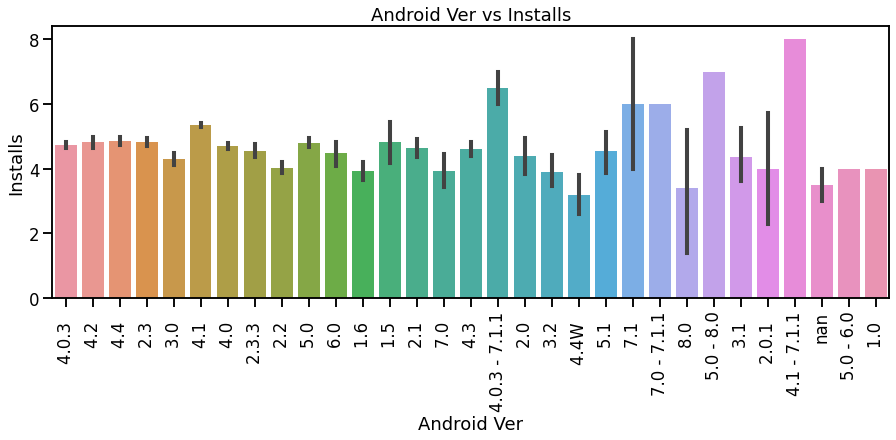

In [ ]:
plt.figure(figsize=(15,5))
fig=sns.barplot(x='Android Ver', y='Installs', data=playstore_df)
plt.title('Android Ver vs Installs')
plt.xticks(rotation=90)
plt.show()

From the above bar plot, we observe that applications with android version 4.1 - 7.1.1 have the maximum average number of installs (around 100,000,000 - number 8) followed by applications with android version 5.0 - 8.0. We notice that apps with android version 4.4W and 8.0 have low number of installs as compared to other android versions. We also observe that apps with android version 7.1 have the highest variability since they have high standard deviation and apps with android version 4.0.3 and 4.0 have the lowest variability since they have low standard deviation.

In [ ]:
fig = px.histogram(x=np.log10(playstore_df[playstore_df['Type'] == 1]['Earning']), nbins=10)
fig.update_layout(xaxis_title_text='log(Earning)')
fig.show()

Looking at the above histogram, those with paid apps are making mostly between 1000 USD and 100,000 USD. This could be a lot or a very small amount, as it depends on the cost of development: 100,000 USD could be very good for a single-developer side project, but is almost negligible for an app from a major company.

In short, this does not seem to bode well for companies to develop apps and rely solely on initial purchase revenue, and we see that reflected in the popularity of in-app purchases and subscription models.

In [ ]:
fig = px.scatter(playstore_df, x='Installs', y='Reviews', trendline="ols", color='Installs')
fig.update_layout(title_text='Installs vs Reviews', title_x=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



From the above regression plot, we infer that feature Reviews is positively correlated with Installs feature. As the number of installs for an app increases, the user reviews for the app also increases.

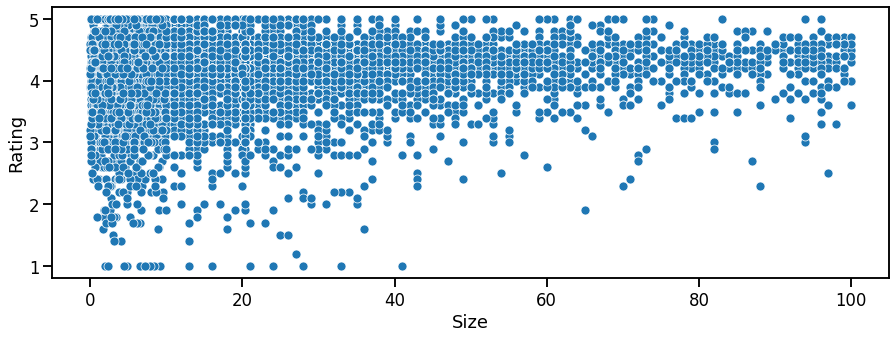

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Size', y='Rating', data=playstore_df)
plt.show()

From the above scatterplot, we observe that data points are scattered all over the plot. Majority of the applications with size ranging from 20 megabytes to 100 megabytes have user ratings from 3 to 5. As the size of an app increases, the user ratings are usually on the higher range from 3 to 5.

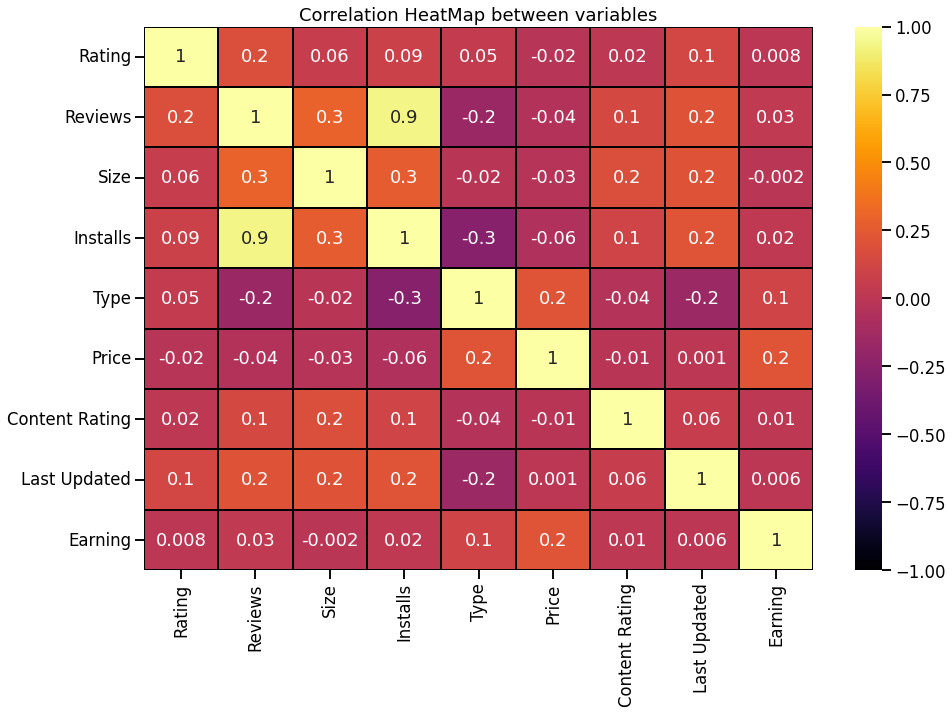

In [ ]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(playstore_df.corr(),annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap between variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

The above heatmap shows the correlation between variables on each axis. We observe that there exists severe collinearity issues exist between Installs feature and Reviews feature since there is a correlation > 0.8 between the two features. Features Installs and Reviews are very strongly positively correlated to each other with a correlation of 0.9. There is a weak positive correlation between Installs and Size (0.3). Variables Installs and Last Updated are also weakly positively correlated to each other having a correlation of 0.2. Except features Installs and Reviews, we infer that not many features have really strong positive correlation. We also notice that there are features which have a weak negative correlation too. For example, variable Price has weak negative correlation with Installs variable (-0.06). There is weaker negative correlation (-0.05) between features Price and Reviews. Variables Type, Price are weakly negatively correlated with Installs variable (target variable). There are other features too which have negative correlation between them. From the above heatmap, we also conclude that variables Review is the most significant feature in finding the number of installs of an application since it is very strongly positively correlated with Installs feature. Variables Size, Rating, Content Rating, Last Updated also have a positive correlation with Installs variable but they have a weaker positive correlation as compared to variable Reviews.Hence, Size, Rating, Content Rating, Last Updated may not be significant in finding the number of installs for an app.

# **DATA PREPROCESSING CONTINUED**

#####<u>One-Hot Encoding of Genres column:</u>

In [34]:
playstore_df = pd.get_dummies(playstore_df, columns=['Genres'])


#####<u>One-Hot Encoding of Android Ver column:</u>

In [35]:
playstore_df = pd.get_dummies(playstore_df, columns=['Android Ver'])
playstore_df.head()


,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Earning,Genres_Action,...,Android Ver_5.0,Android Ver_5.0 - 6.0,Android Ver_5.0 - 8.0,Android Ver_5.1,Android Ver_6.0,Android Ver_7.0,Android Ver_7.0 - 7.1.1,Android Ver_7.1,Android Ver_8.0,Android Ver_nan
0,4.1,2,19.0,4,0,0.0,0,2018,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,2,14.0,5,0,0.0,0,2018,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,4,8.7,6,0,0.0,0,2018,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,5,25.0,7,0,0.0,2,2018,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,2,2.8,5,0,0.0,0,2018,0.0,0,...,0,0,0,0,0,0,0,0,0,0


#<b>TOP 20 ANALYSIS</b>

In [ ]:
top20_df = copy.deepcopy(playstore_df)
top20_df['AppName'] = original_df['App']

#### <u>Top 20 apps by installs:</u>

In [ ]:
top20_df.sort_values(by='Installs', ascending=False)[:20][['Installs','AppName']]

,Installs,AppName
3665,9,YouTube
2545,9,Instagram
3117,9,Maps - Navigate & Explore
341,9,Hangouts
340,9,Gmail
2554,9,Google+
1654,9,Subway Surfers
338,9,Google Chrome: Fast & Secure
336,9,WhatsApp Messenger
335,9,Messenger – Text and Video Chat for Free


#### <u>Top 20 Paid Apps by Installs</u>

In [ ]:
top20_df[top20_df['Type'] == 1].sort_values(by='Installs', ascending=False)[:20][['Installs','AppName']]

,Installs,AppName
4034,7,Hitman Sniper
2241,7,Minecraft
7417,6,Grand Theft Auto: San Andreas
3405,6,HD Widgets
3403,6,Beautiful Widgets Pro
2883,6,Facetune - For Free
8860,6,Bloons TD 5
9941,6,Tasker
9678,6,Where's My Water?
6675,6,Infinity Dungeon VIP


#### <u>Top 20 Paid Apps by Earnings</u>

In [ ]:
top20_df[top20_df['Type'] == 1].sort_values(by='Earning', ascending=False)[:20][['Earning','AppName']]

,Earning,AppName
2241,69900000.0,Minecraft
5351,39999000.0,I am rich
4034,9900000.0,Hitman Sniper
7417,6990000.0,Grand Theft Auto: San Andreas
2883,5990000.0,Facetune - For Free
5578,5990000.0,Sleep as Android Unlock
8804,4990000.0,DraStic DS Emulator
4367,4000000.0,I'm Rich - Trump Edition
5356,3999900.0,I Am Rich Premium
4362,3999900.0,💎 I'm rich


#<b>DATA PREPROCESSING CONCLUDED</b>

In [36]:
# dropping the Earning column

playstore_df.drop(labels='Earning', axis=1, inplace=True)

#**ASSOCIATIONS BETWEEN GENRES OF APPLICATIONS**

For this part, we will find associations between genres of applications by determining which genres are popular and unpopular.

In [37]:
from mlxtend.preprocessing import one_hot, TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

We can add a new feature for genre association: is there an association with installs > 1,000,000. This will allow use to create rules relating popularity to the classification of the app by genre.

In order to do this, we transform it into a format that mlxtend's apriori() can handle: each possible classification has a column, and the rows store a boolean value if the classification is true or false in that row.

In [38]:
def pop_str(install):
    if install >= 6:
        return "Popular"
    else:
        return "Unpopular"

genres_df['Popularity'] = genres_df['Installs'].map(pop_str)

genres_df['Genres'] = genres_df['Genres'].str.cat(genres_df['Popularity'],sep=';')

def split_genres(genre_string):
    return genre_string.split(';')

genres_df['Genres'] = genres_df['Genres'].map(split_genres)

In [39]:
genres_df['Genres']

0                      [Art & Design, Unpopular]
1        [Art & Design, Pretend Play, Unpopular]
2                        [Art & Design, Popular]
3                        [Art & Design, Popular]
4          [Art & Design, Creativity, Unpopular]
                          ...                   
10836                     [Education, Unpopular]
10837                     [Education, Unpopular]
10838                       [Medical, Unpopular]
10839             [Books & Reference, Unpopular]
10840                       [Lifestyle, Popular]
Name: Genres, Length: 9659, dtype: object

In [40]:
genres = genres_df['Genres']
transformer = TransactionEncoder().fit(genres)
transformed_data = transformer.transform(genres)
genres_df = pd.DataFrame(transformed_data, columns=transformer.columns_)

I'll plot the frequency of the different genres in the dataset:

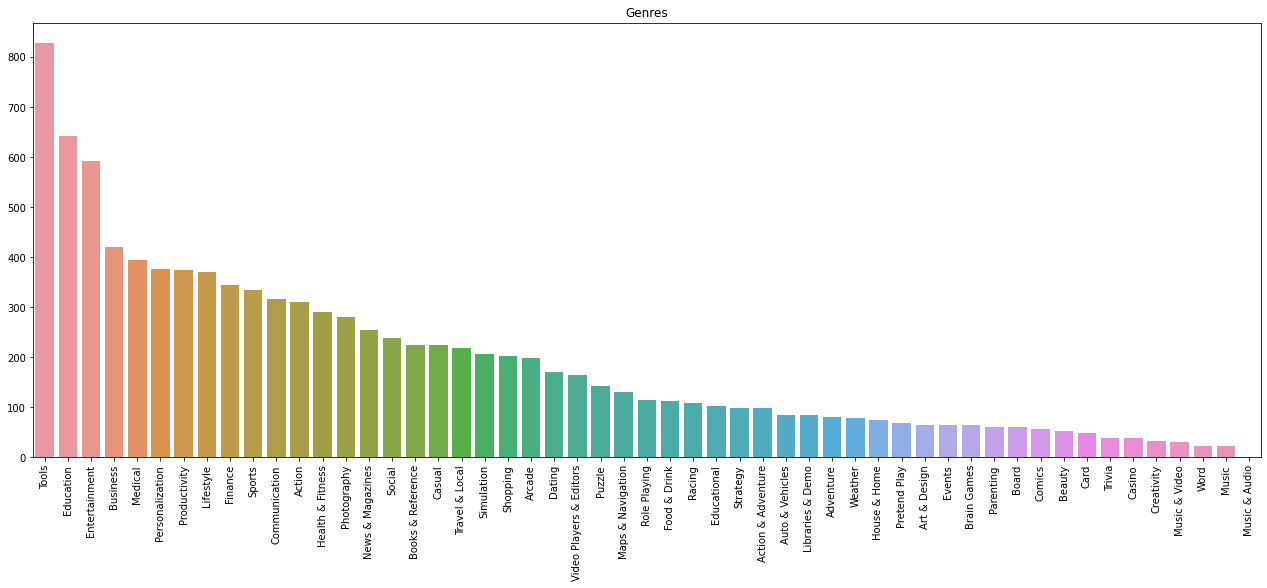

In [41]:
fig = plt.subplots(figsize=(22,8))
counts_df = genres_df.drop(['Popular','Unpopular'],axis=1).sum()
order = counts_df.sort_values(ascending=False).index
plot1 = sns.barplot(x=counts_df.index, y=counts_df, order=order)
plot1.set_title('Genres')
nul = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

Now we use apriori() to generate all combinations of classification that appear in the dataset at least a given threshold frequency (support). This minimum support is 0.5% of the data. We want trends that are applicable to events that occur frequently enough to be meaningful, but as above, even the most popular genres occur very infrequently.

In [42]:
frequent_itemsets = apriori(genres_df, min_support=0.005, use_colnames=True)
print(frequent_itemsets)

      support                              itemsets
0    0.032198                              (Action)
1    0.010146                  (Action & Adventure)
2    0.008282                           (Adventure)
3    0.020603                              (Arcade)
4    0.006729                        (Art & Design)
..        ...                                   ...
105  0.014391                   (Social, Unpopular)
106  0.021741                   (Sports, Unpopular)
107  0.057356                    (Tools, Unpopular)
108  0.013045           (Travel & Local, Unpopular)
109  0.008179  (Video Players & Editors, Unpopular)

[110 rows x 2 columns]


Now that we have these combinations, we look for rules that can give us good lift and reasonable confidence, and which contain either "Popular" or "Unpopular" as the consequent. These rules tell us that the antecedent combination of genres is a good indicator of popularity relative to the frequency of popularity in the dataset.

In [43]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules = rules[rules['confidence'] > 0.7]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Action & Adventure),(Popular),0.010146,0.351486,0.007144,0.704082,2.003159,0.003577,2.191531


With our parameters here, we can see that games classified as "Action & Adventure" appear in ~1% of the apps, but about 70% of those apps have more than 1,000,000 installs.

We can make some more dubious associations by considering more "unicorn" events that occur much less frequently (support as low as 0.005%), and looking at similar rules:

In [44]:
less_frequent_itemsets = apriori(genres_df, min_support=0.00005, use_colnames=True)
print(less_frequent_itemsets)
less_rules = association_rules(less_frequent_itemsets, metric="lift", min_threshold=1.5)
less_rules = less_rules[less_rules['confidence'] > 0.7]
less_rules

      support                                 itemsets
0    0.032198                                 (Action)
1    0.010146                     (Action & Adventure)
2    0.008282                              (Adventure)
3    0.020603                                 (Arcade)
4    0.006729                           (Art & Design)
..        ...                                      ...
328  0.000104          (Pretend Play, Racing, Popular)
329  0.000311    (Pretend Play, Role Playing, Popular)
330  0.000104      (Pretend Play, Simulation, Popular)
331  0.000104  (Pretend Play, Role Playing, Unpopular)
332  0.000207    (Pretend Play, Simulation, Unpopular)

[333 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Action & Adventure),(Popular),0.010146,0.351486,0.007144,0.704082,2.003159,0.003577,2.191531
86,(Music & Audio),(Music & Video),0.000104,0.003209,0.000104,1.000000,311.580645,0.000103,inf
88,(Music & Audio),(Unpopular),0.000104,0.648514,0.000104,1.000000,1.541986,0.000036,inf
114,"(Action, Action & Adventure)",(Popular),0.001242,0.351486,0.000932,0.750000,2.133800,0.000495,2.594057
144,"(Action & Adventure, Art & Design)",(Unpopular),0.000104,0.648514,0.000104,1.000000,1.541986,0.000036,inf
160,"(Action & Adventure, Card)",(Popular),0.000207,0.351486,0.000207,1.000000,2.845066,0.000134,inf
166,"(Casual, Action & Adventure)",(Popular),0.001346,0.351486,0.001242,0.923077,2.626215,0.000769,8.430686
172,"(Action & Adventure, Education)",(Popular),0.000414,0.351486,0.000311,0.750000,2.133800,0.000165,2.594057
186,"(Action & Adventure, Entertainment)",(Popular),0.000311,0.351486,0.000311,1.000000,2.845066,0.000201,inf
190,"(Action & Adventure, Health & Fitness)",(Popular),0.000104,0.351486,0.000104,1.000000,2.845066,0.000067,inf


From this we can see that all games that were classified as both "Brain Games" and "Parenting" had lots of installs, while all apps that had "Education" and "Books & Reference" had fewer installs. These are both very infrequent in the dataset, so this trend might not be valid if the sample size were larger.

Looking at the lift, knowing that an app is also a "Brain Game" increases greatly the probability it is popular, if it is already a "Role Playing" game, but apparently if it is a "Card" game, it means it is guaranteed to be unpopular!

In [45]:
less_frequent_itemsets = apriori(genres_df, min_support=0.005, use_colnames=True)
print(less_frequent_itemsets)
less_rules = association_rules(less_frequent_itemsets, metric="lift", min_threshold=1.0)
less_rules = less_rules[less_rules['confidence'] > 0.7]
less_rules

      support                              itemsets
0    0.032198                              (Action)
1    0.010146                  (Action & Adventure)
2    0.008282                           (Adventure)
3    0.020603                              (Arcade)
4    0.006729                        (Art & Design)
..        ...                                   ...
105  0.014391                   (Social, Unpopular)
106  0.021741                   (Sports, Unpopular)
107  0.057356                    (Tools, Unpopular)
108  0.013045           (Travel & Local, Unpopular)
109  0.008179  (Video Players & Editors, Unpopular)

[110 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Action & Adventure),(Popular),0.010146,0.351486,0.007144,0.704082,2.003159,0.003577,2.191531
6,(Art & Design),(Unpopular),0.006729,0.648514,0.005487,0.815385,1.257312,0.001123,1.903881
8,(Auto & Vehicles),(Unpopular),0.008800,0.648514,0.006937,0.788235,1.215448,0.001230,1.659793
10,(Books & Reference),(Unpopular),0.023294,0.648514,0.017807,0.764444,1.178763,0.002701,1.492156
13,(Business),(Unpopular),0.043483,0.648514,0.036339,0.835714,1.288660,0.008140,2.139478
18,(Dating),(Unpopular),0.017704,0.648514,0.014287,0.807018,1.244410,0.002806,1.821335
20,(Education),(Unpopular),0.066467,0.648514,0.053215,0.800623,1.234550,0.010110,1.762920
24,(Events),(Unpopular),0.006626,0.648514,0.006005,0.906250,1.397425,0.001708,3.749180
26,(Finance),(Unpopular),0.035718,0.648514,0.026090,0.730435,1.126320,0.002926,1.303898
32,(Libraries & Demo),(Unpopular),0.008697,0.648514,0.007351,0.845238,1.303345,0.001711,2.271138


#**MODEL CREATION AND EVALUATION: WITH REVIEWS**

####<u>Scaling the data:</u>

In [46]:
X = playstore_df.drop(labels='Installs', axis=1)
y = playstore_df['Installs']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
scaled_df.head()

,Rating,Reviews,Size,Type,Price,Content Rating,Last Updated,Genres_Action,Genres_Adventure,Genres_Arcade,...,Android Ver_5.0,Android Ver_5.0 - 6.0,Android Ver_5.0 - 8.0,Android Ver_5.1,Android Ver_6.0,Android Ver_7.0,Android Ver_7.0 - 7.1.1,Android Ver_7.1,Android Ver_8.0,Android Ver_nan
0,0.775,0.285714,0.189931,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.725,0.285714,0.139927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925,0.571429,0.086922,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.875,0.714286,0.249936,0.0,0.0,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.825,0.285714,0.027917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####<u> Splitting the data into training set and testing set:</u>

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=42)

#### <u>Model 1 - SVC (Support Vector Classifier) :</u>

In [48]:
parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'sigmoid']}

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_grid = GridSearchCV(SVC(), param_grid=parameters, cv=3, refit=True, verbose=3)
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.262 total time=   6.3s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=   3.3s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=   3.3s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.252 total time=   3.1s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.256 total time=   3.1s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.253 total time=   3.1s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.364 total time=   3.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.355 total time=   3.1s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.364 total time=   3.0s
[CV 1/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.298 total time=   2.8s
[CV 2/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.292 total time=   2.8s
[CV 3/3] END ..C=0.1, gamma=0.1, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [50]:
print('Best hyperparameters:', svm_grid.best_params_)

Best hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
svm_predictions = svm_grid.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

print('\t\tConfusion Matrix')
print(confusion_matrix(y_test, svm_predictions))

		Confusion Matrix
[[  0   2   3   0   0   0   0   0   0   0]
 [  0   2  22   1   0   0   0   0   0   0]
 [  0   1  92  55   3   0   0   0   0   0]
 [  0   1  41 270  35   0   0   0   0   0]
 [  0   0   0 103 258  45   1   0   0   0]
 [  0   0   0   0 110 341  49   0   0   0]
 [  0   0   0   0   3 108 414  73   0   0]
 [  0   0   0   1   0   1  56 259  23   0]
 [  0   0   0   0   0   0   2  29  49   0]
 [  0   0   0   0   0   0   0   1   5   0]]


In [53]:
from sklearn.metrics import classification_report

print('\t\t\tClassification Report')
print(classification_report(y_test, svm_predictions))

			Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.08      0.13        25
           2       0.58      0.61      0.60       151
           3       0.63      0.78      0.69       347
           4       0.63      0.63      0.63       407
           5       0.69      0.68      0.69       500
           6       0.79      0.69      0.74       598
           7       0.72      0.76      0.74       340
           8       0.64      0.61      0.62        80
           9       0.00      0.00      0.00         6

    accuracy                           0.69      2459
   macro avg       0.50      0.48      0.48      2459
weighted avg       0.68      0.69      0.68      2459



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print('Average cross-validated score of the best hyperparamters:',svm_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.6715481171548117


<u>Model 2 - Logistic Regression Model :</u>

In [55]:
params = {'C': np.logspace(-3,7,20), 'penalty': ['l2'], 'solver': ['saga']}

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=params, cv=3, refit=True, verbose=3)
logistic_grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.248 total time=   0.4s
[CV 2/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.248 total time=   0.5s
[CV 3/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.248 total time=   0.5s
[CV 1/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.265 total time=   0.5s
[CV 2/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.266 total time=   0.5s
[CV 3/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.267 total time=   0.5s
[CV 1/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.355 total time=   0.5s
[CV 2/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.343 total time=   0.4s
[CV 3/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.351 total time=   0.4s
[CV 1/3] END C=0.0379269019073225, penalty=l2, solver=saga;, score=0.429 total time=   0.4s
[CV 2/3] END C=0.0379269019073225, penal

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.660 total time=  20.9s
[CV 2/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.664 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.647 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.661 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.664 total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.649 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.660 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.664 total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.649 total time=  28.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.660 total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.664 total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.648 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.660 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.664 total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.648 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.660 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.664 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.648 total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.660 total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.664 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.648 total time=  25.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.660 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.664 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.648 total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 3.35981829e-03, 1.12883789e-02, 3.79269019e-02,
       1.27427499e-01, 4.28133240e-01, 1.43844989e+00, 4.83293024e+00,
       1.62377674e+01, 5.45559478e+01, 1.83298071e+02, 6.15848211e+02,
       2.06913808e+03, 6.95192796e+03, 2.33572147e+04, 7.84759970e+04,
       2.63665090e+05, 8.85866790e+05, 2.97635144e+06, 1.00000000e+07]),
                         'penalty': ['l2'], 'solver': ['saga']},
             verbose=3)

In [57]:
print('Best hyperparameters:', logistic_grid.best_params_)

Best hyperparameters: {'C': 6951.927961775606, 'penalty': 'l2', 'solver': 'saga'}


In [58]:
log_predictions = logistic_grid.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

print('\t\tClassification Report')
print(classification_report(y_test, log_predictions))


		Classification Report
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.37      0.28      0.32        25
           2       0.60      0.49      0.54       151
           3       0.62      0.74      0.68       347
           4       0.62      0.64      0.63       407
           5       0.68      0.66      0.67       500
           6       0.75      0.74      0.75       598
           7       0.75      0.71      0.73       340
           8       0.66      0.64      0.65        80
           9       0.50      0.33      0.40         6

    accuracy                           0.68      2459
   macro avg       0.57      0.54      0.55      2459
weighted avg       0.68      0.68      0.68      2459



#### Examining the model coefficients for the Logistic Regression Model and Applying RFE to produce a smaller model with similar accuracy

In [ ]:
coef_df = pd.DataFrame(logistic_grid.best_estimator_.coef_.T, index=X.columns)

In [ ]:
coef_df.head()

,0,1,2,3,4,5,6,7,8,9
Rating,10.687193,11.168227,9.986983,7.801679,6.053390,4.163547,0.167706,-5.605652,-13.934216,-30.488858
Reviews,-87.390711,-75.423866,-61.393701,-42.416061,-18.211039,6.132703,33.368835,57.139099,85.086896,103.107846
Size,-2.600800,0.997689,-0.420395,-0.065291,0.452790,0.386278,0.313427,0.106969,2.408261,-1.578928
Type,6.153859,6.768376,5.942914,4.625696,1.775156,-1.565906,-5.296281,-6.983219,-7.056172,-4.364423
Price,-4.598101,-6.902989,-2.927902,6.157054,7.132439,4.363591,-1.679823,-1.443057,-0.052373,-0.048840


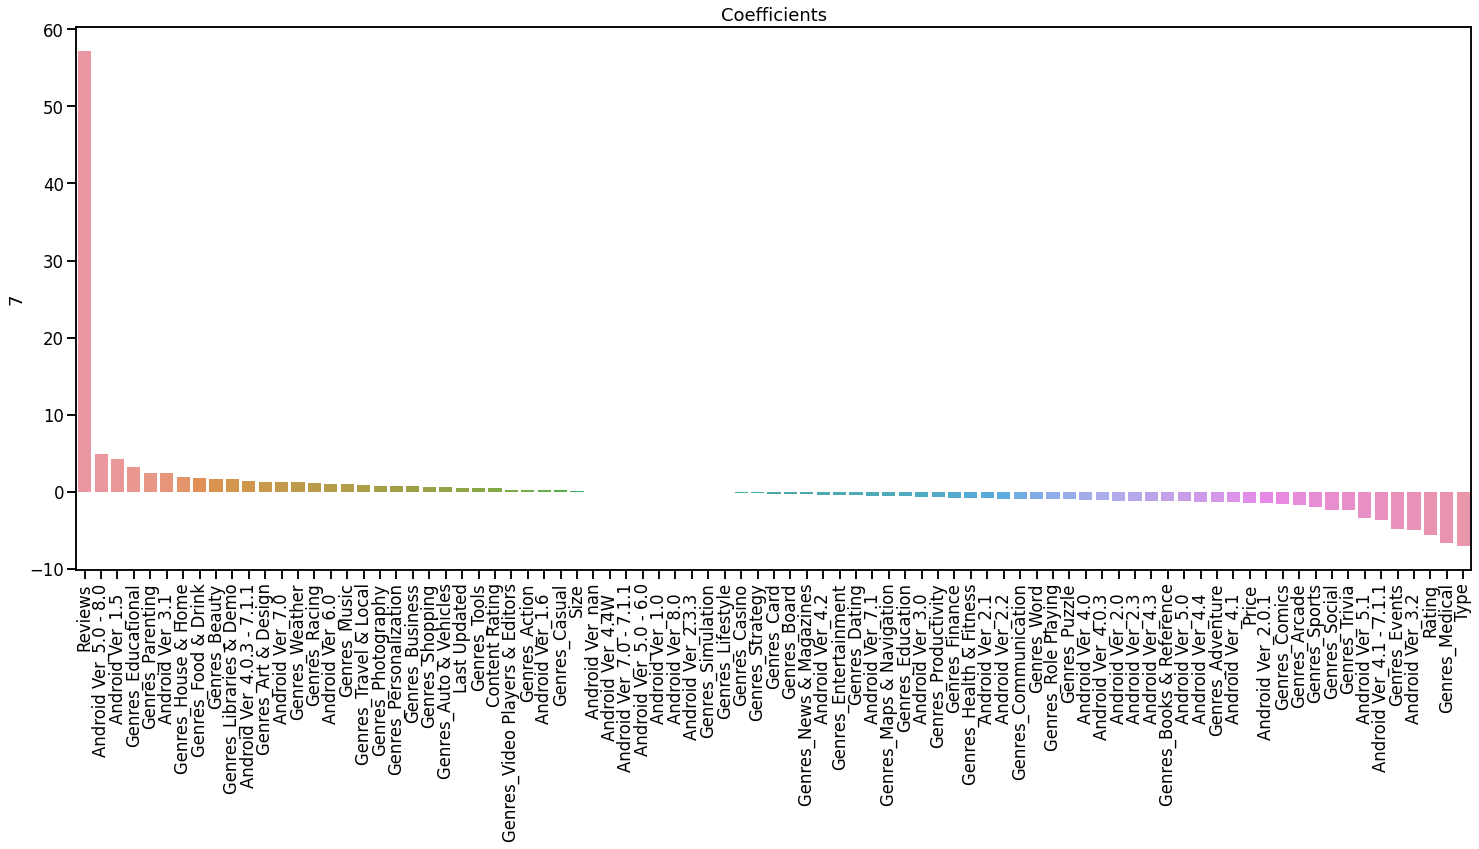

In [ ]:
fig = plt.subplots(figsize=(25,10))
order = coef_df[7].sort_values(ascending=False).index
plot1 = sns.barplot(x=coef_df.index, y=coef_df[7], order=order)
plot1.set_title('Coefficients')
nul = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

The reviews feature is far and away the most important, and the vast majority of features have little import on the model accuracy. We might try RFE to try and remove unnecessary features.

In [ ]:
from sklearn.feature_selection import RFE

estimator = logistic_grid.best_estimator_
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
rfe_ranks = pd.DataFrame(selector.ranking_, index=X.columns)
rfe_ranks[rfe_ranks[0] <= 5]

,0
Rating,1
Reviews,1
Type,1
Price,1
Last Updated,1
Genres_Role Playing,4
Genres_Word,5
Android Ver_1.5,2
Android Ver_7.0,3


In [ ]:
predictions = selector.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

print('\t\tConfusion Matrix')
print(confusion_matrix(y_test, predictions))

		Confusion Matrix
[[  0   1   4   0   0   0   0   0   0   0]
 [  0   2  22   1   0   0   0   0   0   0]
 [  0   6  81  63   1   0   0   0   0   0]
 [  0   1  35 277  34   0   0   0   0   0]
 [  0   0   1 117 256  33   0   0   0   0]
 [  0   0   0   0 117 331  52   0   0   0]
 [  0   0   0   0   3 108 405  82   0   0]
 [  0   0   0   1   0   1  49 262  27   0]
 [  0   0   0   0   0   0   2  34  42   2]
 [  0   0   0   0   0   0   0   1   4   1]]


In [ ]:
from sklearn.metrics import classification_report

print('\t\tClassification Report')
print(classification_report(y_test, predictions))

		Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.20      0.08      0.11        25
           2       0.57      0.54      0.55       151
           3       0.60      0.80      0.69       347
           4       0.62      0.63      0.63       407
           5       0.70      0.66      0.68       500
           6       0.80      0.68      0.73       598
           7       0.69      0.77      0.73       340
           8       0.58      0.53      0.55        80
           9       0.33      0.17      0.22         6

    accuracy                           0.67      2459
   macro avg       0.51      0.48      0.49      2459
weighted avg       0.68      0.67      0.67      2459



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



####<u> Model 3 - MLP Classifier Model</u>

In [60]:
parameters = {'hidden_layer_sizes':[(128,64,64,32),(128,64,32),(64,64,64,64,32)], 'activation':['relu','tanh','logistic'], 'alpha':[0.0001,0.001,0.01]}


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

mlp_grid = RandomizedSearchCV(MLPClassifier(solver='adam', max_iter=500, random_state=42), 
                          param_distributions=parameters, n_iter=20, cv=5, refit=True, verbose=3)
mlp_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.623 total time=  20.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.577 total time=  25.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.639 total time=  27.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.594 total time=  23.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.591 total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.585 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.591 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.582 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.588 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.576 total time= 1.3min
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.581 total time= 1.1min
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.569 total time= 1.1min
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.608 total time=  58.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.568 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.582 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.568 total time= 1.3min
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.605 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.591 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.586 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.582 total time= 1.3min
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.594 total time=  21.5s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.601 total time=  15.3s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.605 total time=  30.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.568 total time=  36.8s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.588 total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.571 total time= 1.3min
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.582 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.600 total time= 1.3min
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.574 total time= 1.2min
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.569 total time= 1.3min
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.582 total time=  30.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.585 total time=  31.6s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.596 total time=  23.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.580 total time=  28.7s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.588 total time=  36.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.673 total time= 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.571 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.585 total time= 1.3min
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.248 total time=   5.6s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.248 total time=   4.9s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.248 total time=   5.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.248 total time=   4.8s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.248 total time=   7.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.679 total time=  19.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.676 total time=  24.6s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.598 total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.602 total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.613 total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.570 total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.595 total time= 1.0min
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.594 total time=  22.6s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.592 total time=  38.7s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.600 total time=  23.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.589 total time=  26.8s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.587 total time=  31.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.571 total time= 1.3min
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.605 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.588 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.578 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.580 total time= 1.3min


RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
                   n_iter=20,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(128, 64, 64,
                                                                32),
                                                               (128, 64, 32),
                                                               (64, 64, 64, 64,
                                                                32)]},
                   verbose=3)

In [62]:
print('Best hyperparameters:', mlp_grid.best_params_)

Best hyperparameters: {'hidden_layer_sizes': (128, 64, 64, 32), 'alpha': 0.0001, 'activation': 'logistic'}


In [63]:
mlp_predictions = mlp_grid.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix

print('\t\tConfusion Matrix')
print(confusion_matrix(y_test, mlp_predictions))

		Confusion Matrix
[[  0   0   4   1   0   0   0   0   0   0]
 [  0   0  24   1   0   0   0   0   0   0]
 [  0   0  99  51   1   0   0   0   0   0]
 [  0   0  50 260  36   1   0   0   0   0]
 [  0   0   1 112 252  42   0   0   0   0]
 [  0   0   0   0 114 341  45   0   0   0]
 [  0   0   0   0   3 109 435  51   0   0]
 [  0   0   0   1   0   1  83 239  16   0]
 [  0   0   0   0   0   0   1  35  44   0]
 [  0   0   0   0   0   0   0   1   5   0]]


In [65]:
from sklearn.metrics import classification_report

print('\t\tClassification Report')
print(classification_report(y_test, mlp_predictions))

		Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        25
           2       0.56      0.66      0.60       151
           3       0.61      0.75      0.67       347
           4       0.62      0.62      0.62       407
           5       0.69      0.68      0.69       500
           6       0.77      0.73      0.75       598
           7       0.73      0.70      0.72       340
           8       0.68      0.55      0.61        80
           9       0.00      0.00      0.00         6

    accuracy                           0.68      2459
   macro avg       0.47      0.47      0.47      2459
weighted avg       0.67      0.68      0.68      2459



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print('Average cross-validated score of the best hyperparamters:', mlp_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.6786964327483604


#### <u>Model 4 - Random Forest Classifier Model</u>

In [76]:
params = {'n_estimators': [50,80,110,150,200,300], 'max_features': ['auto', 'sqrt'],
          'max_depth': [10,30,50,70,90], 'min_samples_leaf': [1,2,4] }

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_randomGrid = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=params, cv=3, refit=True, verbose=3)
rf_randomGrid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=110;, score=0.661 total time=   0.7s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=110;, score=0.666 total time=   0.7s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=110;, score=0.653 total time=   0.6s
[CV 1/3] END max_depth=90, max_features=auto, min_samples_leaf=4, n_estimators=80;, score=0.650 total time=   0.4s
[CV 2/3] END max_depth=90, max_features=auto, min_samples_leaf=4, n_estimators=80;, score=0.658 total time=   0.4s
[CV 3/3] END max_depth=90, max_features=auto, min_samples_leaf=4, n_estimators=80;, score=0.646 total time=   0.4s
[CV 1/3] END max_depth=70, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.644 total time=   0.4s
[CV 2/3] END max_depth=70, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.643 total time=   0.4s
[CV 3/3] END max

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 30, 50, 70, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [50, 80, 110, 150, 200,
                                                         300]},
                   verbose=3)

In [78]:
print('Best hyperparameters:', rf_randomGrid.best_params_)

Best hyperparameters: {'n_estimators': 300, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70}


In [79]:
rf_randomGrid_predictions = rf_randomGrid.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix

print('\t\tConfusion Matrix')
print(confusion_matrix(y_test, rf_randomGrid_predictions))

		Confusion Matrix
[[  0   1   4   0   0   0   0   0   0   0]
 [  0   3  16   5   1   0   0   0   0   0]
 [  0   3  53  91   4   0   0   0   0   0]
 [  0   0  20 269  58   0   0   0   0   0]
 [  0   0   1  93 253  60   0   0   0   0]
 [  0   0   0   0  97 353  50   0   0   0]
 [  0   0   0   0   3 107 426  62   0   0]
 [  0   0   0   0   1   2  64 267   6   0]
 [  0   0   0   0   0   0   3  62  15   0]
 [  0   0   0   0   0   0   0   5   1   0]]


In [81]:
from sklearn.metrics import classification_report

print('\t\tClassification Report')
print(classification_report(y_test, rf_randomGrid_predictions))

		Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.43      0.12      0.19        25
           2       0.56      0.35      0.43       151
           3       0.59      0.78      0.67       347
           4       0.61      0.62      0.61       407
           5       0.68      0.71      0.69       500
           6       0.78      0.71      0.75       598
           7       0.67      0.79      0.73       340
           8       0.68      0.19      0.29        80
           9       0.00      0.00      0.00         6

    accuracy                           0.67      2459
   macro avg       0.50      0.43      0.44      2459
weighted avg       0.67      0.67      0.66      2459



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
print('Average cross-validated score of the best hyperparamters:',rf_randomGrid.best_score_)

Average cross-validated score of the best hyperparamters: 0.6647489539748954


####<u>Comparison of Model Accuracies</u>

In [85]:
from sklearn.metrics import accuracy_score

svm_grid_accuracy = accuracy_score(y_test, svm_predictions)
logistic_grid_accuracy = accuracy_score(y_test, log_predictions)
mlp_grid_accuracy = accuracy_score(y_test, mlp_predictions)
rf_randomGrid_accuracy = accuracy_score(y_test, rf_randomGrid_predictions )

fig=px.bar( x=['Support Vector Classifier', 'Logistic Regression', 'MLP Classifier', 'Random Forest Classifier'],
           y=[svm_grid_accuracy, logistic_grid_accuracy, mlp_grid_accuracy, rf_randomGrid_accuracy],
           color=['Support Vector Classifier', 'Logistic Regression', 'MLP Classifier', 'Random Forest Classifier'],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.5,1])

fig.update_layout(title_text ='Model Accuracy Comparison', title_x=0.5)
fig.show()

#**MODEL CREATION AND EVALUATION: WITHOUT REVIEWS + BINARIZED INSTALLS**

We create modified dataframes and run a train-test split on them.

In [86]:
X_no_reviews = scaled_df.drop(['Reviews'],axis=1)

def binarify(y):
  return y >= 6
y_no_reviews = y.map(binarify)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_no_reviews, y_no_reviews, test_size=0.3, random_state=42)

The code to run the models is abstracted. Every model will be fitted using a hyperparameter grid search using cross-validation to provide the best protection against overfitting.

We save the models to disk in order to not have to re-fit when the fitting code doesn't change but we are disconnected from Colab and lose our state.

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

svm_params = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'sigmoid']}
log_params = {'C': np.logspace(-3,7,20), 'penalty': ['l2'], 'solver': ['saga']}
mlp_params = {'hidden_layer_sizes':[(128,64,64,32),(128,64,32),(64,64,64,64,32)], 'activation':['relu','tanh','logistic'], 'alpha':[0.0001,0.001,0.01]}
rfc_params = {'n_estimators': [50,80,110,150,200,300], 'max_features': ['auto', 'sqrt'],
          'max_depth': [10,30,50,70,90], 'min_samples_leaf': [1,2,4] }




**SVM Gridsearch**

In [90]:
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, verbose=3, cv=3, refit = True).fit(X_train, y_train)
svm_predictions = svm_grid.predict(X_test)
print('\n\t\tConfusion Matrix')
print(confusion_matrix(y_test, svm_predictions))
print('\n\t\tClassification Report')
print(classification_report(y_test, svm_predictions))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   3.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   2.6s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   1.8s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.498 total time=   1.9s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.476 total time=   1.9s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.486 total time=   1.9s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.668 total time=   1.8s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   1.8s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   1.8s
[CV 1/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.662 total time=   1.6s
[CV 2/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.673 total time=   1.6s
[CV 3/3] END ..C=0.1, gamma=0.1, kernel=sigmoid

In [105]:
print('Best hyperparameters:', svm_grid.best_params_)

Best hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [106]:
print('Average cross-validated score of the best hyperparamters:', svm_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.7224546722454672


**RFC RandomizedSearch**

In [91]:
rfc_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=params, cv=3, refit=True, verbose=3).fit(X_train, y_train)
rfc_predictions = rfc_grid.predict(X_test)
print('\n\t\tConfusion Matrix')
print(confusion_matrix(y_test, rfc_predictions))
print('\n\t\tClassification Report')
print(classification_report(y_test, rfc_predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.764 total time=   0.3s
[CV 2/3] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.756 total time=   0.3s
[CV 3/3] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.745 total time=   0.3s
[CV 1/3] END max_depth=90, max_features=auto, min_samples_leaf=1, n_estimators=300;, score=0.765 total time=   1.9s
[CV 2/3] END max_depth=90, max_features=auto, min_samples_leaf=1, n_estimators=300;, score=0.758 total time=   1.9s
[CV 3/3] END max_depth=90, max_features=auto, min_samples_leaf=1, n_estimators=300;, score=0.745 total time=   1.9s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.764 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.768 total time=   0.2s
[CV 3/3] END max

In [103]:
print('Best hyperparameters:', rfc_grid.best_params_)

Best hyperparameters: {'n_estimators': 300, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70}


In [104]:
print('Average cross-validated score of the best hyperparamters:', rfc_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.7622036262203626


**LogReg Gridsearch, with analysis of LogReg parameters**

In [93]:
log_grid = GridSearchCV(LogisticRegression(), param_grid=log_params, verbose=3, cv=3, refit = True).fit(X_train, y_train)
log_predictions = log_grid.predict(X_test)
print('\n\t\tConfusion Matrix')
print(confusion_matrix(y_test, log_predictions))
print('\n\t\tClassification Report')
print(classification_report(y_test, log_predictions))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.587 total time=   0.2s
[CV 2/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.587 total time=   0.2s
[CV 3/3] END ..C=0.001, penalty=l2, solver=saga;, score=0.587 total time=   0.2s
[CV 1/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.608 total time=   0.2s
[CV 2/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.612 total time=   0.2s
[CV 3/3] END C=0.003359818286283781, penalty=l2, solver=saga;, score=0.610 total time=   0.2s
[CV 1/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.683 total time=   0.2s
[CV 2/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.694 total time=   0.2s
[CV 3/3] END C=0.011288378916846888, penalty=l2, solver=saga;, score=0.678 total time=   0.2s
[CV 1/3] END C=0.0379269019073225, penalty=l2, solver=saga;, score=0.703 total time=   0.2s
[CV 2/3] END C=0.0379269019073225, penal

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=16.23776739188721, penalty=l2, solver=saga;, score=0.722 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=16.23776739188721, penalty=l2, solver=saga;, score=0.730 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=16.23776739188721, penalty=l2, solver=saga;, score=0.720 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=54.555947811685144, penalty=l2, solver=saga;, score=0.723 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=54.555947811685144, penalty=l2, solver=saga;, score=0.729 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=54.555947811685144, penalty=l2, solver=saga;, score=0.719 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=183.29807108324337, penalty=l2, solver=saga;, score=0.722 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=183.29807108324337, penalty=l2, solver=saga;, score=0.729 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=183.29807108324337, penalty=l2, solver=saga;, score=0.719 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=615.8482110660254, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=615.8482110660254, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=615.8482110660254, penalty=l2, solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=2069.13808111479, penalty=l2, solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.722 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=6951.927961775606, penalty=l2, solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=23357.21469090121, penalty=l2, solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.722 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.728 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=78475.99703514607, penalty=l2, solver=saga;, score=0.718 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=263665.08987303555, penalty=l2, solver=saga;, score=0.718 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.722 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.728 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=885866.7904100833, penalty=l2, solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=2976351.441631313, penalty=l2, solver=saga;, score=0.718 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.728 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/3] END C=10000000.0, penalty=l2, solver=saga;, score=0.718 total time=   0.5s

		Confusion Matrix
[[1124  311]
 [ 415  609]]

		Classification Report
              precision    recall  f1-score   support

       False       0.73      0.78      0.76      1435
        True       0.66      0.59      0.63      1024

    accuracy                           0.70      2459
   macro avg       0.70      0.69      0.69      2459
weighted avg       0.70      0.70      0.70      2459



In [101]:
print('Best hyperparameters:', log_grid.best_params_)

Best hyperparameters: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'saga'}


In [102]:
print('Average cross-validated score of the best hyperparamters:', log_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.7245467224546722


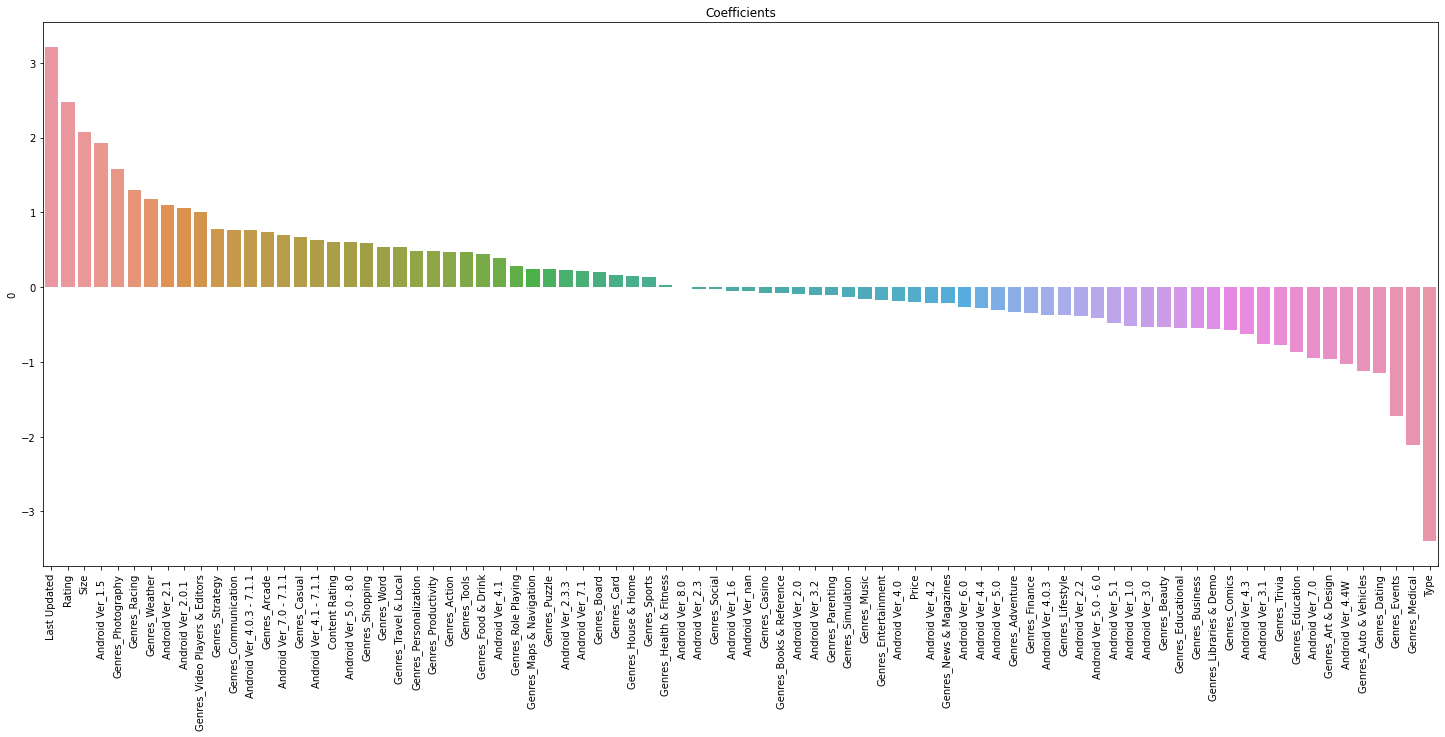

In [94]:
coef_df = pd.DataFrame(log_grid.best_estimator_.coef_.T, index=X_no_reviews.columns)
fig = plt.subplots(figsize=(25,10))
order = coef_df[0].sort_values(ascending=False).index
plot1 = sns.barplot(x=coef_df.index, y=coef_df[0], order=order)
plot1.set_title('Coefficients')
nul = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

**MLP Classifier on no-reviews dataset**

In [97]:
mlp_grid = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_params, n_iter=20, cv=3, refit = True, verbose=3).fit(X_train, y_train)
mlp_predictions = mlp_grid.predict(X_test)
print('\n\t\tConfusion Matrix')
print(confusion_matrix(y_test, mlp_predictions))
print('\n\t\tClassification Report')
print(classification_report(y_test, mlp_predictions))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.722 total time=   8.1s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.734 total time=   9.4s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.716 total time=   9.7s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.719 total time=   9.7s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.732 total time=   5.3s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.715 total time=  10.9s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.720 total time=   7.0s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.734 total time=  10.7s
[CV 3/3] END activation=l

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.718 total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.723 total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.725 total time=  23.2s
[CV 1/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.720 total time=   9.8s
[CV 2/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.731 total time=  14.0s
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.713 total time=  14.4s
[CV 1/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.730 total time=   8.9s
[CV 2/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.728 total time=   8.1s
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.714 total time=  10.7s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.728 total time=   8.7s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.715 total time=  18.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.718 total time=  18.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.728 total time=  18.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.715 total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.715 total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.713 total time=  23.2s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.712 total time=  11.3s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.707 total time=  12.8s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32);, score=0.721 total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.711 total time=  24.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.716 total time=  25.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.717 total time=  23.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.717 total time=  17.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.708 total time=  17.4s
[CV 3/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.727 total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.711 total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.715 total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64, 64, 32);, score=0.721 total time=  23.1s
[CV 1/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.717 total time=  11.9s
[CV 2/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.732 total time=   9.4s
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64, 64, 32);, score=0.711 total time=  11.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.721 total time=  18.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.739 total time=  19.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.714 total time=  18.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.730 total time=  14.0s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.715 total time=  10.4s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32);, score=0.727 total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.731 total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.728 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64, 32);, score=0.727 total time=  19.8s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.587 total time=   2.2s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.587 total time=   3.2s
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(128, 64, 64, 32);, score=0.587 total time=   3.8s

		Confusion Matrix
[[1082  353]
 [ 361  663]]

		Classification Report
              precision    recall  f1-score   support

       False       0.75      0.75      0.75      1435
        True       0.65      0.65      0.65      1024

    accuracy                           0.71      2459
   macro avg       0.70      0.70      0.70      2459
weighted avg       0.71      0.71      0.71      2459



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [100]:
print('Best hyperparameters:', mlp_grid.best_params_)

Best hyperparameters: {'hidden_layer_sizes': (128, 64, 32), 'alpha': 0.0001, 'activation': 'tanh'}


In [99]:
print('Average cross-validated score of the best hyperparamters:', mlp_grid.best_score_)

Average cross-validated score of the best hyperparamters: 0.7285564853556487


<b> Comparison of Model Accuracies (Without Reviews and Binarized Installs)</b>

In [98]:
from sklearn.metrics import accuracy_score

svm_grid_accuracy = accuracy_score(y_test, svm_predictions)
logistic_grid_accuracy = accuracy_score(y_test, log_predictions)
mlp_grid_accuracy = accuracy_score(y_test, mlp_predictions)
rf_randomGrid_accuracy = accuracy_score(y_test, rfc_predictions )

fig=px.bar( x=['Support Vector Classifier', 'Logistic Regression', 'MLP Classifier', 'Random Forest Classifier'],
           y=[svm_grid_accuracy, logistic_grid_accuracy, mlp_grid_accuracy, rf_randomGrid_accuracy],
           color=['Support Vector Classifier', 'Logistic Regression', 'MLP Classifier', 'Random Forest Classifier'],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.6,0.8])

fig.update_layout(title_text ='Model Accuracy Comparison (no reviews)', title_x=0.5)
fig.show()